/tmp/ipython-input-3751373233.py:24: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 37.2k/37.2k [00:00<00:00, 4.08MB/s]

Dataset Shape: (1025, 14)


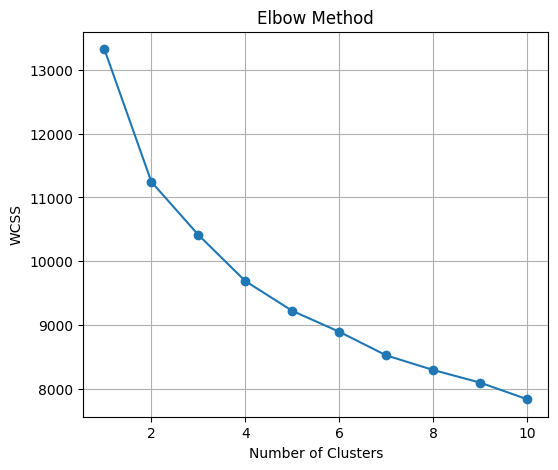

K-Means Silhouette Score: 0.1700813691485787
Hierarchical Silhouette Score: 0.13308610336075302


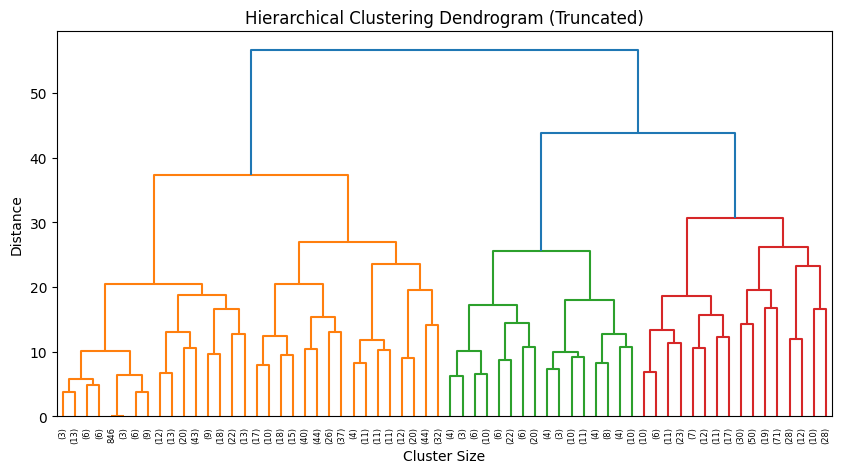

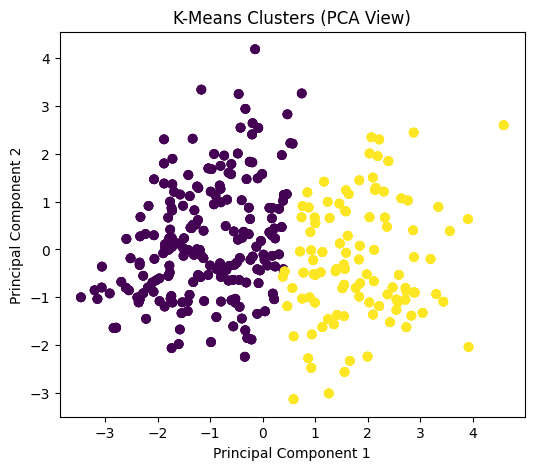

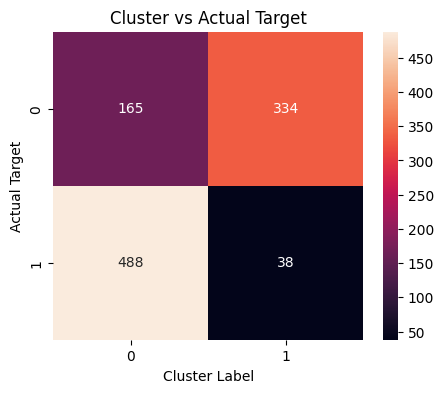

In [1]:
# Install dependencies
!pip install kagglehub -q
!pip install scikit-learn -q

# -------------------------
# Import Libraries
# -------------------------
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# -------------------------
# Load Dataset
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    "heart.csv"
)

print("Dataset Shape:", df.shape)
df.head()

# -------------------------
# Preprocessing
# -------------------------
X = df.drop("target", axis=1)
y = df["target"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# Elbow Method
# -------------------------
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# -------------------------
# K-Means Clustering (K=2)
# -------------------------
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means Silhouette Score:",
      silhouette_score(X_scaled, kmeans_labels))

# -------------------------
# Hierarchical Clustering
# -------------------------
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier_labels = hierarchical.fit_predict(X_scaled)

print("Hierarchical Silhouette Score:",
      silhouette_score(X_scaled, hier_labels))

# -------------------------
# Improved Dendrogram
# -------------------------
plt.figure(figsize=(10,5))

linked = linkage(X_scaled, method='ward')

dendrogram(
    linked,
    truncate_mode='level',  # show only top levels
    p=5,                    # number of levels to show
    show_leaf_counts=True
)

plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


# -------------------------
# PCA Visualization (K-Means)
# -------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title("K-Means Clusters (PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -------------------------
# Confusion Matrix (Cluster vs Actual)
# -------------------------
cm = confusion_matrix(y, kmeans_labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Cluster vs Actual Target")
plt.xlabel("Cluster Label")
plt.ylabel("Actual Target")
plt.show()
